## What has been the impact of the pandemic on mental health, including rates of anxiety, and what factors have contributed to this?

#### By: Jayesh Manoj Lasi - ECO 4465

#### Importing the necessary libraries.

In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree

In [599]:
directory = 'Desktop/4465 PROJECT'

week23 = 'Desktop/4465 PROJECT/HPS_Week23_PUF_CSV/pulse2021_puf_23.csv'
week42 = 'Desktop/4465 PROJECT/HPS_Week42_PUF_CSV/pulse2022_puf_42.csv'
week54 = 'Desktop/4465 PROJECT/HPS_Week54_PUF_CSV/pulse2023_puf_54.csv'

In [600]:
df_week23 = pd.read_csv(week23, na_values=["-88","-99"], engine='python')
df_week42 = pd.read_csv(week42, na_values=["-88","-99"], engine='python')
df_week54 = pd.read_csv(week54, na_values=["-88","-99"], engine='python')

pd.set_option('display.max_columns', None)

In [601]:
#df_week23.head()

In [602]:
#df_week42.head()

In [603]:
#df_week54.head()

In [604]:
df_week23 = df_week23.rename(columns={'EGENDER': 'EGENID_BIRTH'})

In [605]:
df_week23_col = set(df_week23.columns)
df_week42_col = set(df_week42.columns)
df_week54_col = set(df_week54.columns)

In [606]:
common_columns = sorted(list(df_week54_col.intersection(df_week42_col).intersection(df_week23_col)))
common_columns

['ABIRTH_YEAR',
 'AEDUC',
 'AHHLD_NUMKID',
 'AHHLD_NUMPER',
 'AHISPANIC',
 'ANXIOUS',
 'ANYWORK',
 'ARACE',
 'CHILDFOOD',
 'CURFOODSUF',
 'DOWN',
 'EEDUC',
 'EGENID_BIRTH',
 'EST_MSA',
 'EST_ST',
 'EVICT',
 'EXPNS_DIF',
 'FORCLOSE',
 'FREEFOOD',
 'HLTHINS1',
 'HLTHINS2',
 'HLTHINS3',
 'HLTHINS4',
 'HLTHINS5',
 'HLTHINS6',
 'HLTHINS7',
 'HLTHINS8',
 'HWEIGHT',
 'INCOME',
 'INTEREST',
 'KINDWORK',
 'MORTCUR',
 'MS',
 'PRIVHLTH',
 'PUBHLTH',
 'PWEIGHT',
 'RECVDVACC',
 'REGION',
 'RENTCUR',
 'RHISPANIC',
 'RRACE',
 'SCRAM',
 'TBIRTH_YEAR',
 'TENURE',
 'THHLD_NUMADLT',
 'THHLD_NUMKID',
 'THHLD_NUMPER',
 'WEEK',
 'WORRY']

In [607]:
df_combined = pd.concat([df_week23, df_week42, df_week54], ignore_index=True)

In [608]:
df_combined = df_combined.rename(columns={'WEEK': 'YEAR'})
df_combined['YEAR'] = df_combined['YEAR'].map({23: '2021', 42: '2022', 54: '2023'})

In [609]:
df_combined.head()

,SCRAM,YEAR,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENID_BIRTH,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,RECVDVACC,DOSES,GETVACC,WHYNOT1,WHYNOT2,WHYNOT3,WHYNOT4,WHYNOT5,WHYNOT6,WHYNOT7,WHYNOT8,WHYNOT9,WHYNOT10,WHYNOT11,WHYNOTB1,WHYNOTB2,WHYNOTB3,WHYNOTB4,WHYNOTB5,WHYNOTB6,HADCOVID,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,TW_START,UI_APPLY,UI_RECV,SSA_RECV,SSA_APPLY,SSAPGM1,SSAPGM2,SSAPGM3,SSAPGM4,SSAPGM5,SSALIKELY,SSAEXPCT1,SSAEXPCT2,SSAEXPCT3,SSAEXPCT4,SSAEXPCT5,SSADECISN,EIP,EIPSPND1,EIPSPND2,EIPSPND3,EIPSPND4,EIPSPND5,EIPSPND6,EIPSPND7,EIPSPND8,EIPSPND9,EIPSPND10,EIPSPND11,EIPSPND12,EIPSPND13,EXPNS_DIF,CHNGHOW1,CHNGHOW2,CHNGHOW3,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,CHNGHOW8,CHNGHOW9,CHNGHOW10,CHNGHOW11,CHNGHOW12,WHYCHNGD1,WHYCHNGD2,WHYCHNGD3,WHYCHNGD4,WHYCHNGD5,WHYCHNGD6,WHYCHNGD7,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,WHYCHNGD13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,SPNDSRC8,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CURFOODSUF,CHILDFOOD,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,SNAP_YN,TSPNDFOOD,TSPNDPRPD,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,DELAY,NOTGET,PRESCRIPT,MH_SVCS,MH_NOTGET,TENURE,LIVQTR,RENTCUR,MORTCUR,MORTCONF,EVICT,FORCLOSE,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,SCHLHRS,TSTDY_HRS,TCH_HRS,TNUM_PS,PSPLANS1,PSPLANS2,PSPLANS3,PSPLANS4,PSPLANS5,PSPLANS6,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME,AGENID_BIRTH,GENID_DESCRIBE,SEXUAL_ORIENTATION,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,ENRPUBCHK,ENRPRVCHK,ENRHMSCHK,TENROLLPUB,TENROLLPRV,TENROLLHMSCH,ENROLLNONE,ACTVDUTY1,ACTVDUTY2,ACTVDUTY3,ACTVDUTY4,ACTVDUTY5,NUMDOSES,BRAND,GETVACRV,WHYNORV1,WHYNORV2,WHYNORV3,WHYNORV4,WHYNORV5,WHYNORV6,WHYNORV7,WHYNORV8,WHYNORV9,WHYNORV10,WHYNORV11,WHYNORV12,WHYNORV13,KIDDOSES,KIDGETVAC,KIDWHYNO1,KIDWHYNO2,KIDWHYNO3,KIDWHYNO4,KIDWHYNO5,KIDWHYNO6,KIDWHYNO7,KIDWHYNO8,KIDWHYNO9,KIDWHYNO10,KIDWHYNO11,KIDWHYNO12,KIDWHYNO13,KIDWHYNO14,WRKLOSSRV,RSNNOWRKRV,WKVOL,SETTING,UI_APPLYRV,UI_RECVRV,UI_RECVNOW,CHLDCARE,CHLDIMPCT1,CHLDIMPCT2,CHLDIMPCT3,CHLDIMPCT4,CHLDIMPCT5,CHLDIMPCT6,CHLDIMPCT7,CHLDIMPCT8,CHLDIMPCT9,CTC_YN,CTC_USE,CTCSPND1,CTCSPND2,CTCSPND3,CTCSPND4,CTCSPND5,CTCSPND6,CTCSPND7,CTCSPND8,CTCSPND9,CTCSPND10,CTCSPND11,CTCSPND12,CTCSPND13,CTCSPND14,CTCSPND15,CTCSPND16,CTCSPND17,ACTIVITY1,ACTIVITY2,ACTIVITY3,ACTIVITY4,ACTIVITY5,ACTIVITY6,SPND_SRC1,SPND_SRC2,SPND_SRC3,SPND_SRC4,SPND_SRC5,SPND_SRC6,SPND_SRC7,SPND_SRC8,SPND_SRC9,SPND_SRC10,SPND_SRC11,SPND_SRC12,FOODRSNRV1,FOODRSNRV2,FOODRSNRV3,FOODRSNRV4,SCHLFDHLP1,SCHLFDHLP2,SCHLFDHLP3,SCHLFDHLP4,NOSCHLFDHLP,TELEHLTH,TH_ADLT_PHON,TH_ADLT_VID,TELECHLD,TH_CHLD_PHON,TH_CHLD_VID,PRVNTIVE,SEEING,HEARING,REMEMBERING,MOBILITY,LIVQTRRV,TMNTHSBHND,RENTASSIST,ENERGY,HSE_TEMP,ENRGY_BILL,PRVRIDESHR,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,WHENDOSES,WHYNOBSTRRV1,WHYNOBSTRRV2,WHYNOBSTRRV3,WHYNOBSTRRV4,WHYNOBSTRRV5,WHYNOBSTRRV6,WHYNOBSTRRV7,WHYNOBSTRRV8,WHYNOBSTRRV9,KIDGETVAC_LT5Y,KIDGETVAC_5_11Y,KIDGETVAC_12_17Y,KIDWHYNORV1,KIDWHYNORV2,KIDWHYNORV3,KIDWHYNORV4,KIDWHYNORV5,KIDWHYNORV6,KIDWHYNORV7,KIDWHYNORV8,KIDWHYNORV9,KIDWHYNORV10,HADCOVIDRV,WHENCOVID,SYMPTOMS,LONGCOVID,SYMPTMNOW,TWDAYS,SCHLFDHLP_RV1,SCHLFDHLP_RV2,SCHLFDHLP_RV3,SCHLFDHLP_RV4,SCHLFDHLP_RV5,FDBENEFIT1,KIDBHVR1,KIDBHVR2,KIDBHVR3,KIDBHVR4,KIDBHVR5,KIDBHVR6,KIDBHVR7,KIDBHVR8,KIDBHVR9,SELFCARE,UNDERSTAND,TRENTAMT,RENTCHNG,RCVEDUC1,RCVEDUC2,RCVEDUC3,RCVEDUC4,RCVEDUC5,RCVEDUC6,RCVEDUC7,RCVEDUC8,RCVEDUC9,SYMPTMIMPCT,CCARETYP1,CCARETYP2,CCARETYP3,CCARETYP4,CCARETYP5,CCARETYP6,CCARETYP7,CCARETYP8,CCAREPAY,TCCARECOST,PRICECHNG,PRICESTRESS,PRICECOPE1,PRICECOPE

In [610]:
df_combined.shape

(231758, 493)

In [611]:
df_combined.dtypes

SCRAM           object
YEAR            object
EST_ST           int64
EST_MSA        float64
REGION           int64
                ...   
ND_ISOLATE     float64
ND_CRIME       float64
ND_SCAM        float64
MEDICAID       float64
MEDICAID_NO    float64
Length: 493, dtype: object

In [612]:
red_states = [1, 2, 5, 12, 16, 18, 19, 20, 21, 22, 28, 29, 30, 31, 37, 38, 39, 40, 45, 46, 47, 48, 49, 54, 56]

df_combined = pd.concat([df_combined,
                         pd.Series([1 if i in red_states else 0 for i in df_combined['EST_ST']], name='red_states'),
                         pd.Series([0 if i in red_states else 1 for i in df_combined['EST_ST']], name='blue_states')],
                        axis=1)

In [613]:
df_combined.head()

,SCRAM,YEAR,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENID_BIRTH,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,RECVDVACC,DOSES,GETVACC,WHYNOT1,WHYNOT2,WHYNOT3,WHYNOT4,WHYNOT5,WHYNOT6,WHYNOT7,WHYNOT8,WHYNOT9,WHYNOT10,WHYNOT11,WHYNOTB1,WHYNOTB2,WHYNOTB3,WHYNOTB4,WHYNOTB5,WHYNOTB6,HADCOVID,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,TW_START,UI_APPLY,UI_RECV,SSA_RECV,SSA_APPLY,SSAPGM1,SSAPGM2,SSAPGM3,SSAPGM4,SSAPGM5,SSALIKELY,SSAEXPCT1,SSAEXPCT2,SSAEXPCT3,SSAEXPCT4,SSAEXPCT5,SSADECISN,EIP,EIPSPND1,EIPSPND2,EIPSPND3,EIPSPND4,EIPSPND5,EIPSPND6,EIPSPND7,EIPSPND8,EIPSPND9,EIPSPND10,EIPSPND11,EIPSPND12,EIPSPND13,EXPNS_DIF,CHNGHOW1,CHNGHOW2,CHNGHOW3,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,CHNGHOW8,CHNGHOW9,CHNGHOW10,CHNGHOW11,CHNGHOW12,WHYCHNGD1,WHYCHNGD2,WHYCHNGD3,WHYCHNGD4,WHYCHNGD5,WHYCHNGD6,WHYCHNGD7,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,WHYCHNGD13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,SPNDSRC8,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CURFOODSUF,CHILDFOOD,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,SNAP_YN,TSPNDFOOD,TSPNDPRPD,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,DELAY,NOTGET,PRESCRIPT,MH_SVCS,MH_NOTGET,TENURE,LIVQTR,RENTCUR,MORTCUR,MORTCONF,EVICT,FORCLOSE,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,SCHLHRS,TSTDY_HRS,TCH_HRS,TNUM_PS,PSPLANS1,PSPLANS2,PSPLANS3,PSPLANS4,PSPLANS5,PSPLANS6,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME,AGENID_BIRTH,GENID_DESCRIBE,SEXUAL_ORIENTATION,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,ENRPUBCHK,ENRPRVCHK,ENRHMSCHK,TENROLLPUB,TENROLLPRV,TENROLLHMSCH,ENROLLNONE,ACTVDUTY1,ACTVDUTY2,ACTVDUTY3,ACTVDUTY4,ACTVDUTY5,NUMDOSES,BRAND,GETVACRV,WHYNORV1,WHYNORV2,WHYNORV3,WHYNORV4,WHYNORV5,WHYNORV6,WHYNORV7,WHYNORV8,WHYNORV9,WHYNORV10,WHYNORV11,WHYNORV12,WHYNORV13,KIDDOSES,KIDGETVAC,KIDWHYNO1,KIDWHYNO2,KIDWHYNO3,KIDWHYNO4,KIDWHYNO5,KIDWHYNO6,KIDWHYNO7,KIDWHYNO8,KIDWHYNO9,KIDWHYNO10,KIDWHYNO11,KIDWHYNO12,KIDWHYNO13,KIDWHYNO14,WRKLOSSRV,RSNNOWRKRV,WKVOL,SETTING,UI_APPLYRV,UI_RECVRV,UI_RECVNOW,CHLDCARE,CHLDIMPCT1,CHLDIMPCT2,CHLDIMPCT3,CHLDIMPCT4,CHLDIMPCT5,CHLDIMPCT6,CHLDIMPCT7,CHLDIMPCT8,CHLDIMPCT9,CTC_YN,CTC_USE,CTCSPND1,CTCSPND2,CTCSPND3,CTCSPND4,CTCSPND5,CTCSPND6,CTCSPND7,CTCSPND8,CTCSPND9,CTCSPND10,CTCSPND11,CTCSPND12,CTCSPND13,CTCSPND14,CTCSPND15,CTCSPND16,CTCSPND17,ACTIVITY1,ACTIVITY2,ACTIVITY3,ACTIVITY4,ACTIVITY5,ACTIVITY6,SPND_SRC1,SPND_SRC2,SPND_SRC3,SPND_SRC4,SPND_SRC5,SPND_SRC6,SPND_SRC7,SPND_SRC8,SPND_SRC9,SPND_SRC10,SPND_SRC11,SPND_SRC12,FOODRSNRV1,FOODRSNRV2,FOODRSNRV3,FOODRSNRV4,SCHLFDHLP1,SCHLFDHLP2,SCHLFDHLP3,SCHLFDHLP4,NOSCHLFDHLP,TELEHLTH,TH_ADLT_PHON,TH_ADLT_VID,TELECHLD,TH_CHLD_PHON,TH_CHLD_VID,PRVNTIVE,SEEING,HEARING,REMEMBERING,MOBILITY,LIVQTRRV,TMNTHSBHND,RENTASSIST,ENERGY,HSE_TEMP,ENRGY_BILL,PRVRIDESHR,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,WHENDOSES,WHYNOBSTRRV1,WHYNOBSTRRV2,WHYNOBSTRRV3,WHYNOBSTRRV4,WHYNOBSTRRV5,WHYNOBSTRRV6,WHYNOBSTRRV7,WHYNOBSTRRV8,WHYNOBSTRRV9,KIDGETVAC_LT5Y,KIDGETVAC_5_11Y,KIDGETVAC_12_17Y,KIDWHYNORV1,KIDWHYNORV2,KIDWHYNORV3,KIDWHYNORV4,KIDWHYNORV5,KIDWHYNORV6,KIDWHYNORV7,KIDWHYNORV8,KIDWHYNORV9,KIDWHYNORV10,HADCOVIDRV,WHENCOVID,SYMPTOMS,LONGCOVID,SYMPTMNOW,TWDAYS,SCHLFDHLP_RV1,SCHLFDHLP_RV2,SCHLFDHLP_RV3,SCHLFDHLP_RV4,SCHLFDHLP_RV5,FDBENEFIT1,KIDBHVR1,KIDBHVR2,KIDBHVR3,KIDBHVR4,KIDBHVR5,KIDBHVR6,KIDBHVR7,KIDBHVR8,KIDBHVR9,SELFCARE,UNDERSTAND,TRENTAMT,RENTCHNG,RCVEDUC1,RCVEDUC2,RCVEDUC3,RCVEDUC4,RCVEDUC5,RCVEDUC6,RCVEDUC7,RCVEDUC8,RCVEDUC9,SYMPTMIMPCT,CCARETYP1,CCARETYP2,CCARETYP3,CCARETYP4,CCARETYP5,CCARETYP6,CCARETYP7,CCARETYP8,CCAREPAY,TCCARECOST,PRICECHNG,PRICESTRESS,PRICECOPE1,PRICECOPE

In [614]:
df_combined_subset = df_combined[[ 'SCRAM', 'PWEIGHT', 'YEAR', 'EST_ST', 'REGION',
'TBIRTH_YEAR', 'ABIRTH_YEAR', 'RHISPANIC', 'AHISPANIC', 'RRACE', 'ARACE', 'EGENID_BIRTH',
'THHLD_NUMPER','THHLD_NUMADLT', 'THHLD_NUMKID', 
'MS', 'INCOME', 'EEDUC', 'AEDUC',
'ANXIOUS', 'DOWN', 'WORRY', 'INTEREST',
'ANYWORK', 'KINDWORK', 
'CHILDFOOD', 'FREEFOOD', 'CURFOODSUF', 
'EVICT', 'RENTCUR', 'TENURE', 'FORCLOSE', 'EXPNS_DIF', 'MORTCUR',
'HLTHINS1', 'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7','HLTHINS8', 
'PRIVHLTH', 'PUBHLTH', 'RECVDVACC', 'red_states', 'blue_states']]

In [615]:
print(df_combined_subset.isnull().sum())

SCRAM                 0
PWEIGHT               0
YEAR                  0
EST_ST                0
REGION                0
TBIRTH_YEAR           0
ABIRTH_YEAR           0
RHISPANIC             0
AHISPANIC             0
RRACE                 0
ARACE                 0
EGENID_BIRTH          0
THHLD_NUMPER          0
THHLD_NUMADLT         0
THHLD_NUMKID          0
MS                 2136
INCOME            45413
EEDUC                 0
AEDUC                 0
ANXIOUS           29521
DOWN              29865
WORRY             29893
INTEREST          29959
ANYWORK            4824
KINDWORK          98117
CHILDFOOD        207450
FREEFOOD          20926
CURFOODSUF        20031
EVICT            226297
RENTCUR          185002
TENURE            36598
FORCLOSE         226806
EXPNS_DIF         13397
MORTCUR          138842
HLTHINS1          37633
HLTHINS2          50517
HLTHINS3          46549
HLTHINS4          53765
HLTHINS5          55288
HLTHINS6          55914
HLTHINS7          57480
HLTHINS8        

In [616]:
threshold_combined_subset = len(df_combined_subset) * 0.75
df_combined_subset = df_combined_subset.dropna(axis=1, thresh=threshold_combined_subset)
df_combined_subset

,SCRAM,PWEIGHT,YEAR,EST_ST,REGION,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMADLT,THHLD_NUMKID,MS,INCOME,EEDUC,AEDUC,ANXIOUS,DOWN,WORRY,INTEREST,ANYWORK,FREEFOOD,CURFOODSUF,TENURE,EXPNS_DIF,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,PRIVHLTH,PUBHLTH,RECVDVACC,red_states,blue_states
0,V230000001S10011755410111,4125.280963,2021,1,2,1962,2,1,1,4,2,2,3,3,0,2.0,NaN,4,2,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2,1,2.0,1,0
1,V230000001S30010714000111,1735.659603,2021,12,2,1941,2,1,2,1,2,1,2,2,0,1.0,4.0,5,2,4.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,1,1,2.0,1,0
2,V230000001S37010053700121,1477.303599,2021,1,2,1951,2,1,2,1,2,2,2,2,0,3.0,NaN,4,2,4.0,2.0,4.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1,1,2.0,1,0
3,V230000001S51010926100111,43885.043866,2021,12,2,1978,2,1,2,2,2,1,6,2,4,1.0,3.0,3,2,3.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1,1,2.0,1,0
4,V230000001S52011256710121,1487.656806,2021,32,4,1973,2,1,2,1,2,2,4,2,2,1.0,8.0,7,2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231753,V540075705,2543.421566,2023,12,2,1966,2,2,2,1,2,1,3,2,1,1.0,8.0,7,2,1.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2.0,1,0
231754,V540075706,1963.179638,2023,39,3,1969,2,1,2,1,2,2,1,1,0,5.0,1.0,5,2,4.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,2,1.0,1,0
231755,V540075707,734.217283,2023,36,1,1977,2,1,2,1,2,2,1,1,0,5.0,8.0,6,2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,2,1.0,0,1
231756,V540075708,2242.003133,2023,8,4,1951,2,1,2,1,2,2,2,2,0,1.0,6.0,4,2,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1,1,1.0,0,1


In [617]:
print(df_combined_subset.isnull().sum())

SCRAM                0
PWEIGHT              0
YEAR                 0
EST_ST               0
REGION               0
TBIRTH_YEAR          0
ABIRTH_YEAR          0
RHISPANIC            0
AHISPANIC            0
RRACE                0
ARACE                0
EGENID_BIRTH         0
THHLD_NUMPER         0
THHLD_NUMADLT        0
THHLD_NUMKID         0
MS                2136
INCOME           45413
EEDUC                0
AEDUC                0
ANXIOUS          29521
DOWN             29865
WORRY            29893
INTEREST         29959
ANYWORK           4824
FREEFOOD         20926
CURFOODSUF       20031
TENURE           36598
EXPNS_DIF        13397
HLTHINS1         37633
HLTHINS2         50517
HLTHINS3         46549
HLTHINS4         53765
HLTHINS5         55288
HLTHINS6         55914
HLTHINS7         57480
PRIVHLTH             0
PUBHLTH              0
RECVDVACC         2014
red_states           0
blue_states          0
dtype: int64


In [618]:
df_combined_subset.shape

(231758, 40)

In [619]:
df_combined_subset = df_combined_subset.loc[df_combined_subset.notna().all(axis=1)]

In [620]:
df_combined_subset.shape

(156430, 40)

In [621]:
print(df_combined_subset.isnull().sum())

SCRAM            0
PWEIGHT          0
YEAR             0
EST_ST           0
REGION           0
TBIRTH_YEAR      0
ABIRTH_YEAR      0
RHISPANIC        0
AHISPANIC        0
RRACE            0
ARACE            0
EGENID_BIRTH     0
THHLD_NUMPER     0
THHLD_NUMADLT    0
THHLD_NUMKID     0
MS               0
INCOME           0
EEDUC            0
AEDUC            0
ANXIOUS          0
DOWN             0
WORRY            0
INTEREST         0
ANYWORK          0
FREEFOOD         0
CURFOODSUF       0
TENURE           0
EXPNS_DIF        0
HLTHINS1         0
HLTHINS2         0
HLTHINS3         0
HLTHINS4         0
HLTHINS5         0
HLTHINS6         0
HLTHINS7         0
PRIVHLTH         0
PUBHLTH          0
RECVDVACC        0
red_states       0
blue_states      0
dtype: int64


In [622]:
df_combined_subset.columns

Index(['SCRAM', 'PWEIGHT', 'YEAR', 'EST_ST', 'REGION', 'TBIRTH_YEAR',
       'ABIRTH_YEAR', 'RHISPANIC', 'AHISPANIC', 'RRACE', 'ARACE',
       'EGENID_BIRTH', 'THHLD_NUMPER', 'THHLD_NUMADLT', 'THHLD_NUMKID', 'MS',
       'INCOME', 'EEDUC', 'AEDUC', 'ANXIOUS', 'DOWN', 'WORRY', 'INTEREST',
       'ANYWORK', 'FREEFOOD', 'CURFOODSUF', 'TENURE', 'EXPNS_DIF', 'HLTHINS1',
       'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7',
       'PRIVHLTH', 'PUBHLTH', 'RECVDVACC', 'red_states', 'blue_states'],
      dtype='object')

In [623]:
df_combined_subset[['RHISPANIC', 'RRACE', 'EGENID_BIRTH', 'THHLD_NUMPER', 'THHLD_NUMADLT', 'THHLD_NUMKID', 'MS', 'INCOME', 'EEDUC', 'ANXIOUS', 'ANYWORK',  'FREEFOOD', 'CURFOODSUF', 'TENURE', 'EXPNS_DIF', 'HLTHINS1',
       'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7',
       'PRIVHLTH', 'PUBHLTH', 'RECVDVACC']].describe()

,RHISPANIC,RRACE,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMADLT,THHLD_NUMKID,MS,INCOME,EEDUC,ANXIOUS,ANYWORK,FREEFOOD,CURFOODSUF,TENURE,EXPNS_DIF,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,PRIVHLTH,PUBHLTH,RECVDVACC
count,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000,156430.000000
mean,1.086307,1.315278,1.592604,2.684984,2.073534,0.611449,2.232762,4.628262,5.348405,2.043962,1.372166,1.952605,1.395589,2.028422,1.901336,1.334380,1.782663,1.737352,1.879710,1.957425,1.952726,1.990430,1.210791,1.631388,1.339717
std,0.280818,0.780165,0.491351,1.454003,0.917786,1.026534,1.608749,2.114371,1.437164,1.064312,0.483384,0.212483,0.662811,0.742075,1.040730,0.471775,0.412435,0.440074,0.325302,0.201897,0.212224,0.097356,0.407871,0.482430,0.473615
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,3.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,5.000000,6.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,3.000000,6.000000,7.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
max,2.000000,4.000000,2.000000,10.000000,10.000000,5.000000,5.000000,8.000000,7.000000,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### Examining the distribution of data

Text(0, 0.5, 'Frequency')

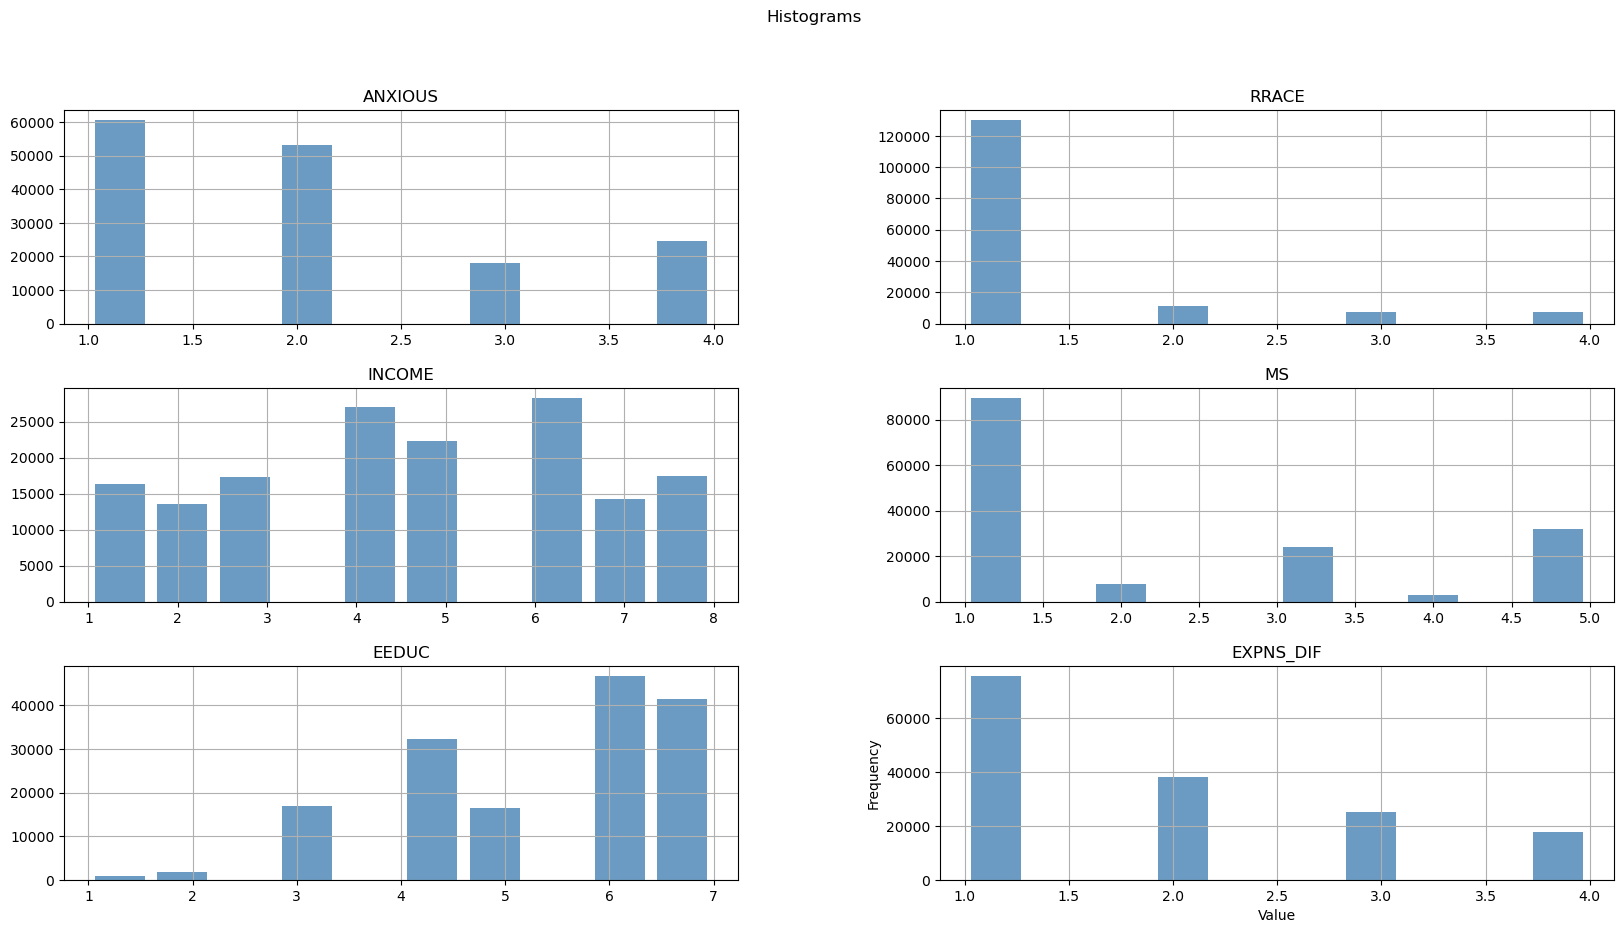

In [624]:
df_combined_subset[['ANXIOUS', 'RRACE', 'INCOME', 'MS', 'EEDUC', 'EXPNS_DIF']].hist(bins=10, figsize=(20, 10), alpha=0.8, rwidth=0.8, color='steelblue')
plt.suptitle('Histograms')
plt.xlabel('Value')
plt.ylabel('Frequency')

## Measuring the relationship between Anxiety and Income:

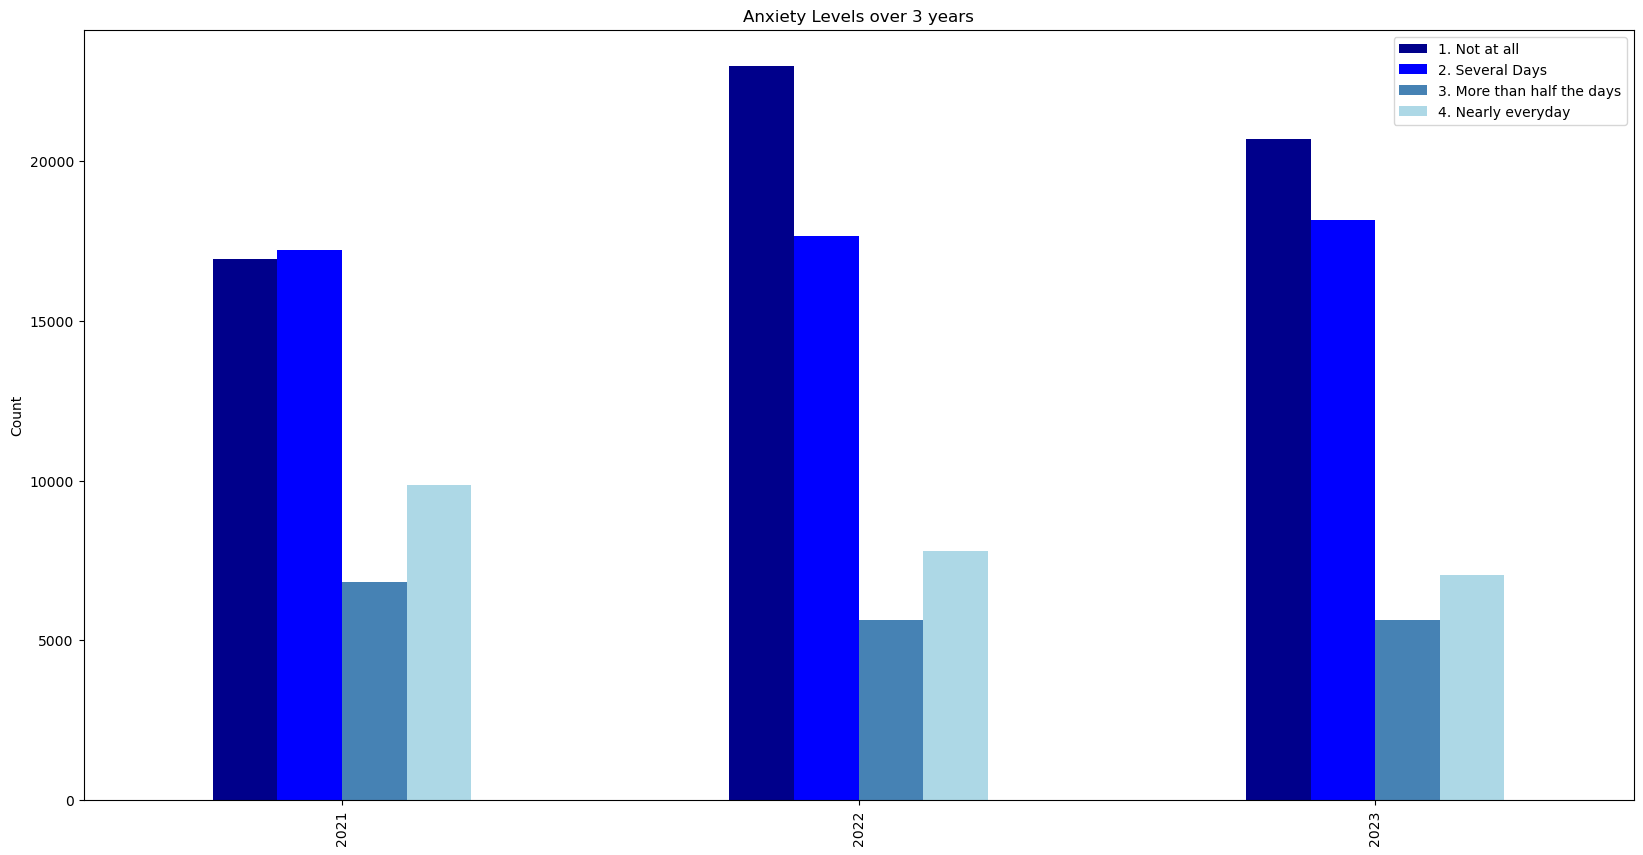

In [632]:
counts_by_week_ANXIOUS = df_combined_subset.groupby('YEAR')['ANXIOUS'].value_counts().unstack()

counts_by_week_ANXIOUS.plot(kind='bar', figsize = (20,10), color = ['darkblue', 'blue', 'steelblue', 'lightblue'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Anxiety Levels over 3 years')
plt.legend(title='Anxiety Level')

plt.legend(['1. Not at all', '2. Several Days', '3. More than half the days', '4. Nearly everyday'])

plt.show()

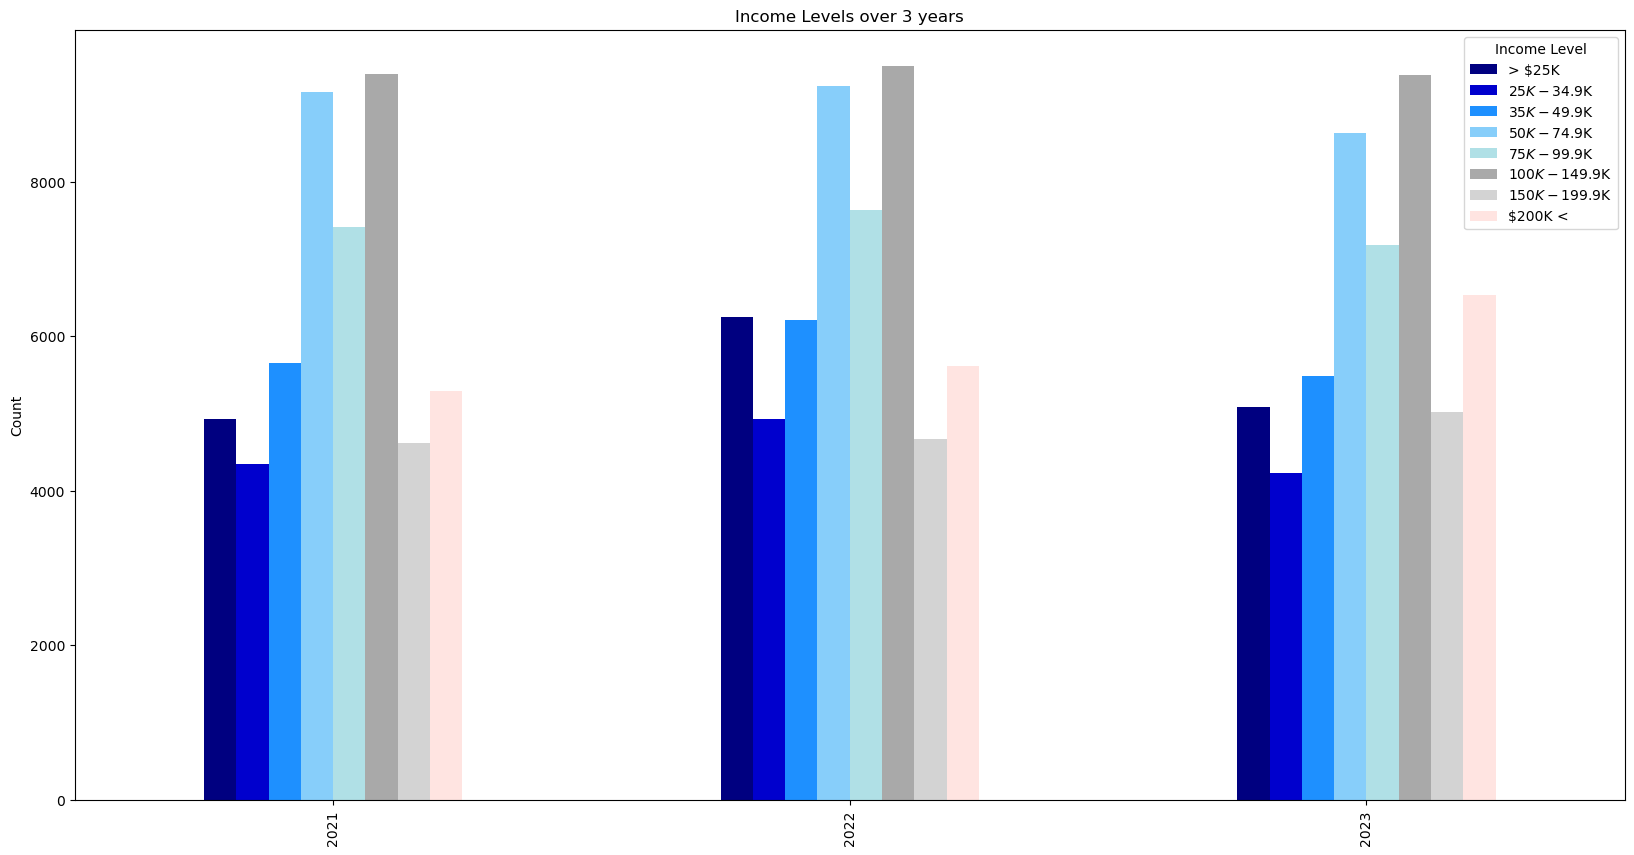

In [646]:
counts_by_week_INCOME = df_combined_subset.groupby('YEAR')['INCOME'].value_counts().unstack()

counts_by_week_INCOME.plot(kind='bar', figsize = (20,10), color = ['#000080', '#0000CD', '#1E90FF', '#87CEFA', '#B0E0E6', '#A9A9A9', '#D3D3D3', '#FFE4E1'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Income Levels over 3 years')
plt.legend(title='Income Level', labels=['> $25K', '$25K - $34.9K', '$35K - $49.9K','$50K - $74.9K', '$75K - $99.9K', '$100K - $149.9K', '$150K - $199.9K', '$200K <'])
plt.show()

In [647]:
Ast = df_combined_subset.groupby(['INCOME', 'ANXIOUS']).agg({'ANXIOUS': 'count'}).unstack()
Ast = Ast.div(Ast.sum(axis=1), axis=0)
Ast

ANXIOUS                              
ANXIOUS       1.0       2.0       3.0       4.0
INCOME                                         
1.0      0.273040  0.305112  0.145675  0.276174
2.0      0.324450  0.325783  0.135539  0.214228
3.0      0.346608  0.331162  0.131750  0.190479
4.0      0.376336  0.339054  0.122536  0.162074
5.0      0.405469  0.342553  0.114544  0.137435
6.0      0.419308  0.352802  0.103332  0.124558
7.0      0.441152  0.354068  0.095052  0.109729
8.0      0.482144  0.349900  0.083118  0.084838

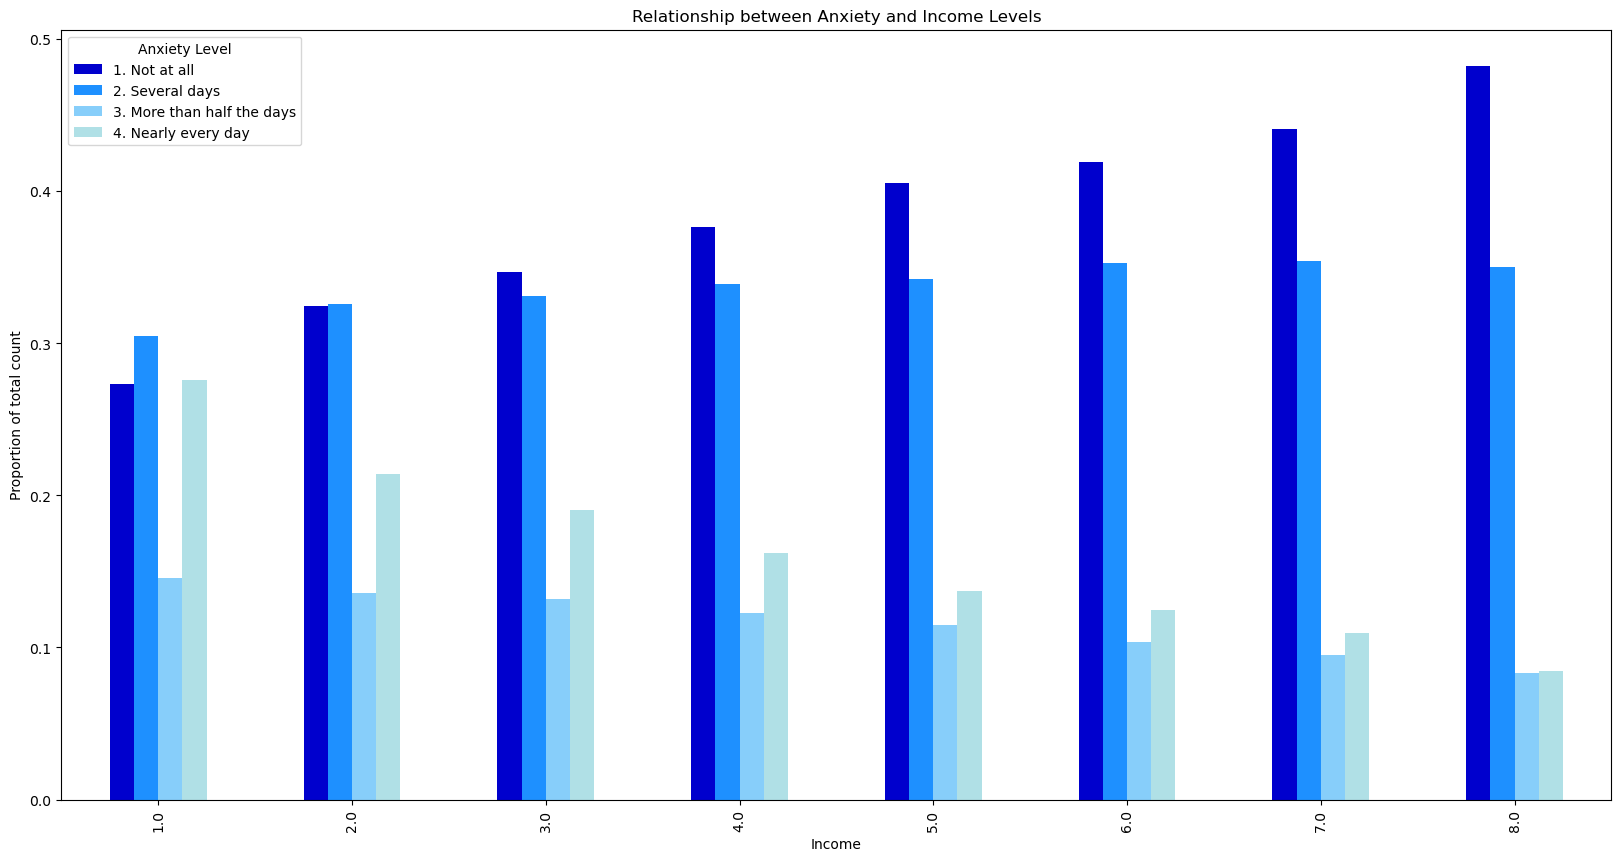

In [651]:
Ast.plot(kind='bar', figsize = (20,10), color = ['#0000CD', '#1E90FF', '#87CEFA', '#B0E0E6'])

plt.xlabel('Income')
plt.ylabel('Proportion of total count')
plt.title('Relationship between Anxiety and Income Levels')
plt.legend(title='Anxiety Level', labels=['1. Not at all', '2. Several days', '3. More than half the days', '4. Nearly every day'])


plt.show()

## ANXIETY LEVELS AND POLITICAL LEANING

In [660]:
df_combined_subset0 = df_combined_subset.copy()

In [661]:
df_combined_subset0['ANXIOUS'] = df_combined_subset0['ANXIOUS'].map({
    1.0: "1. Not at all",
    2.0: "2. Several days",
    3.0: "3. More than half the days",
    4.0: "4. Nearly every day"
})

### Red States

In [662]:
red_states1 = df_combined_subset0[df_combined_subset0['red_states'] == 1]

Xst = red_states1[['YEAR', 'ANXIOUS', 'red_states']]
Xst = Xst.groupby(['YEAR', 'ANXIOUS', 'red_states']).agg({'ANXIOUS': 'count'}) / Xst.groupby(['YEAR']).agg({'ANXIOUS': 'count'})
Xst

ANXIOUS
YEAR ANXIOUS                    red_states          
2021 1. Not at all              1           0.350582
     2. Several days            1           0.325621
     3. More than half the days 1           0.132006
     4. Nearly every day        1           0.191792
2022 1. Not at all              1           0.436742
     2. Several days            1           0.313302
     3. More than half the days 1           0.105385
     4. Nearly every day        1           0.144570
2023 1. Not at all              1           0.399122
     2. Several days            1           0.346988
     3. More than half the days 1           0.110786
     4. Nearly every day        1           0.143104

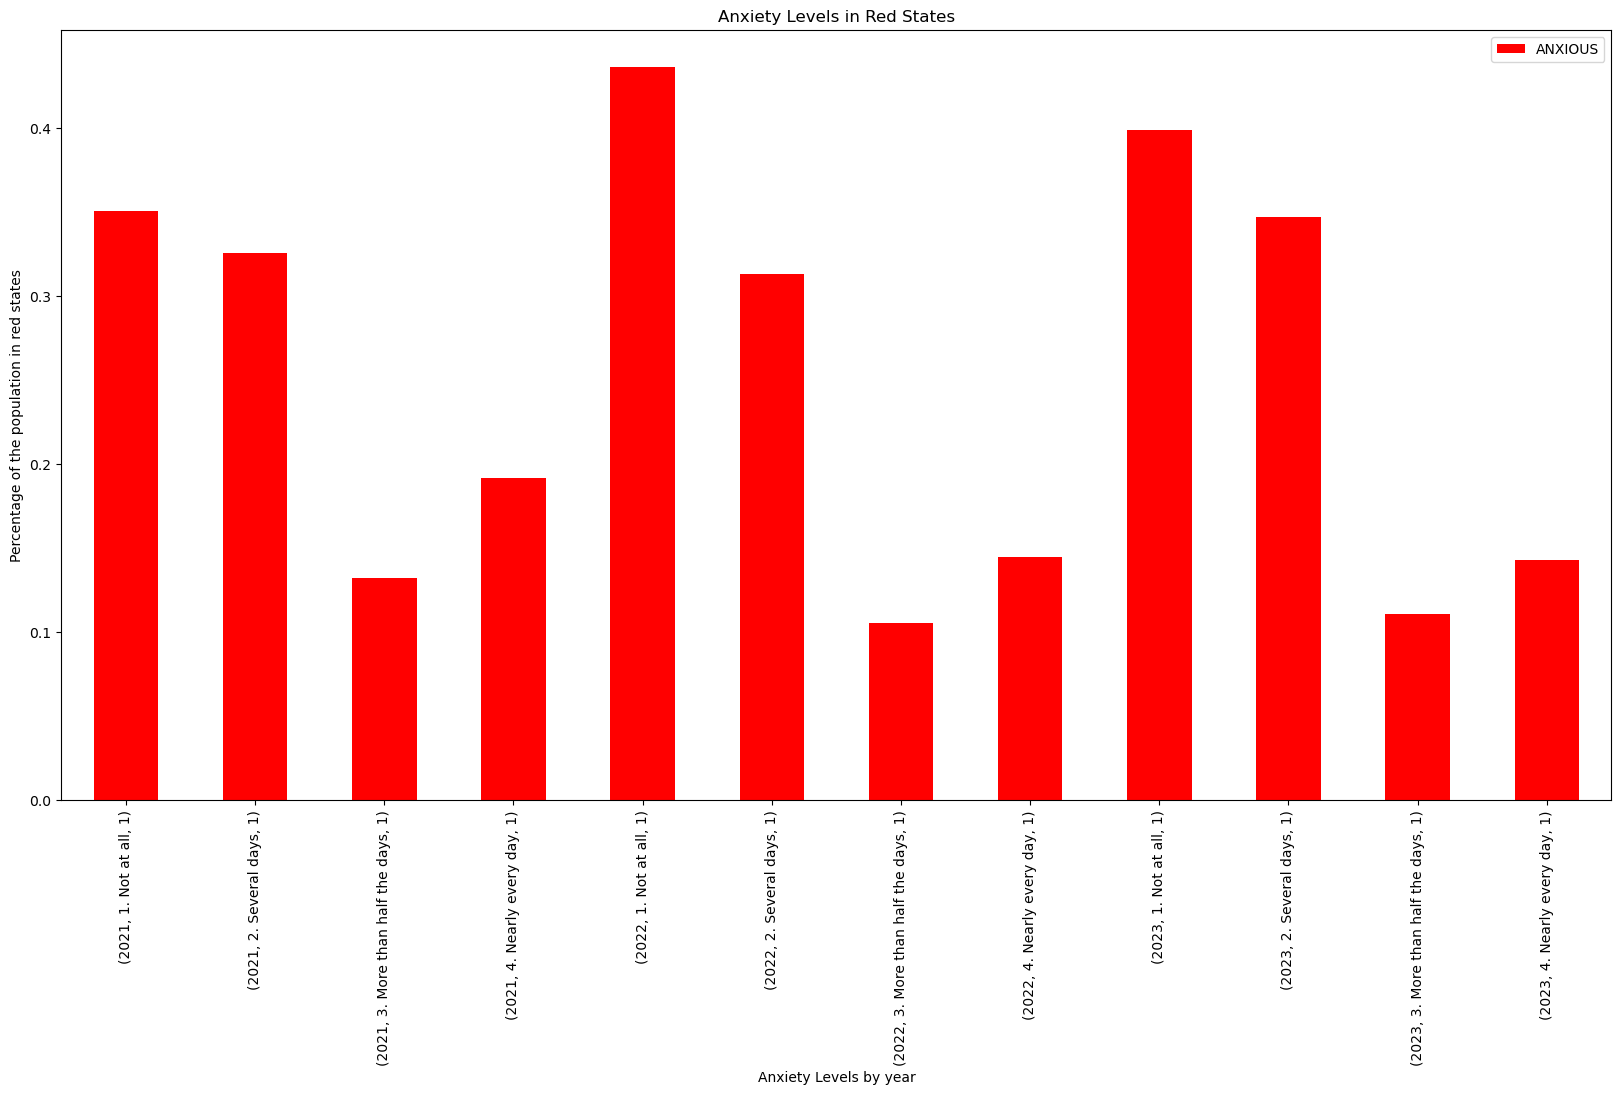

In [663]:
Xst.plot(kind='bar', figsize = (20,10), color=['red'])

plt.xlabel('Anxiety Levels by year')
plt.ylabel('Percentage of the population in red states')
plt.title('Anxiety Levels in Red States')

plt.show()

### Blue States

In [664]:
red_states0 = df_combined_subset0[df_combined_subset0['red_states'] == 0]

Yst = red_states0[['YEAR', 'ANXIOUS', 'red_states']]
Yst = Yst.groupby(['YEAR', 'ANXIOUS', 'red_states']).agg({'ANXIOUS': 'count'}) / Yst.groupby(['YEAR']).agg({'ANXIOUS': 'count'})
Yst

ANXIOUS
YEAR ANXIOUS                    red_states          
2021 1. Not at all              0           0.320578
     2. Several days            0           0.348139
     3. More than half the days 0           0.135633
     4. Nearly every day        0           0.195650
2022 1. Not at all              0           0.416430
     2. Several days            0           0.336083
     3. More than half the days 0           0.103704
     4. Nearly every day        0           0.143783
2023 1. Not at all              0           0.403657
     2. Several days            0           0.356805
     3. More than half the days 0           0.107642
     4. Nearly every day        0           0.131896

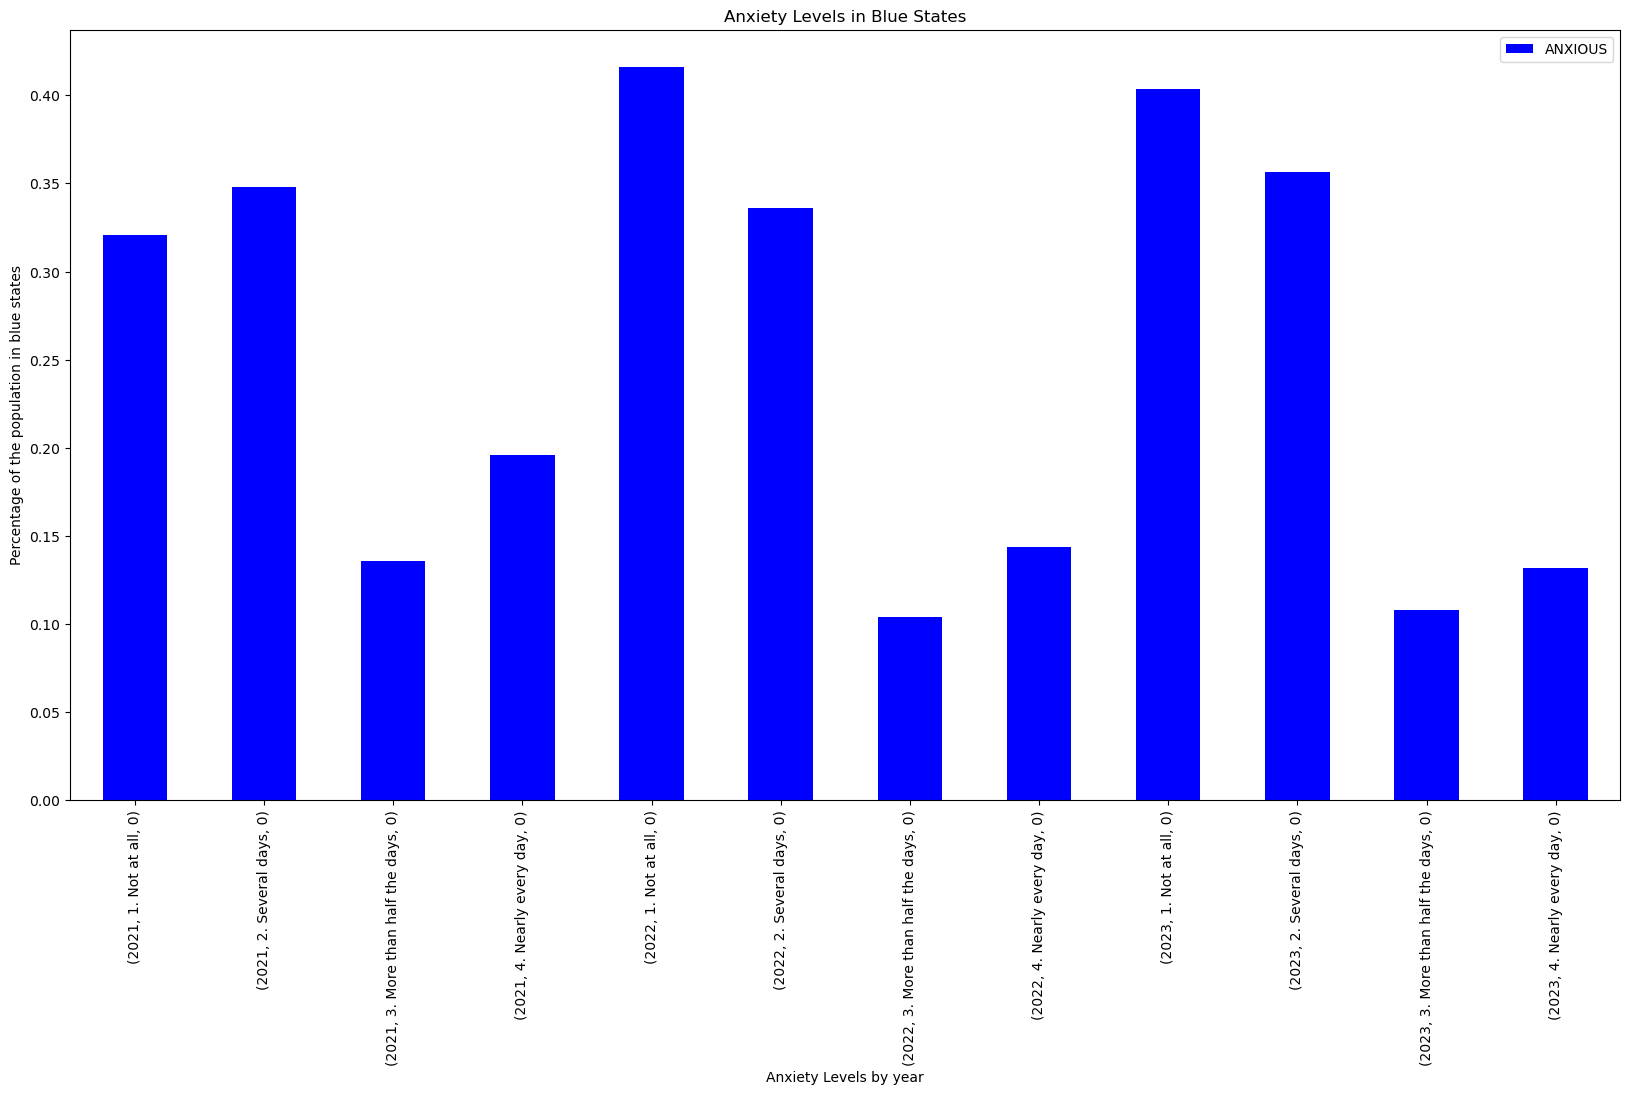

In [665]:
Yst.plot(kind='bar', figsize = (20,10), color=['blue'])

plt.xlabel('Anxiety Levels by year')
plt.ylabel('Percentage of the population in blue states')
plt.title('Anxiety Levels in Blue States')

plt.show()

### Red and Blue States

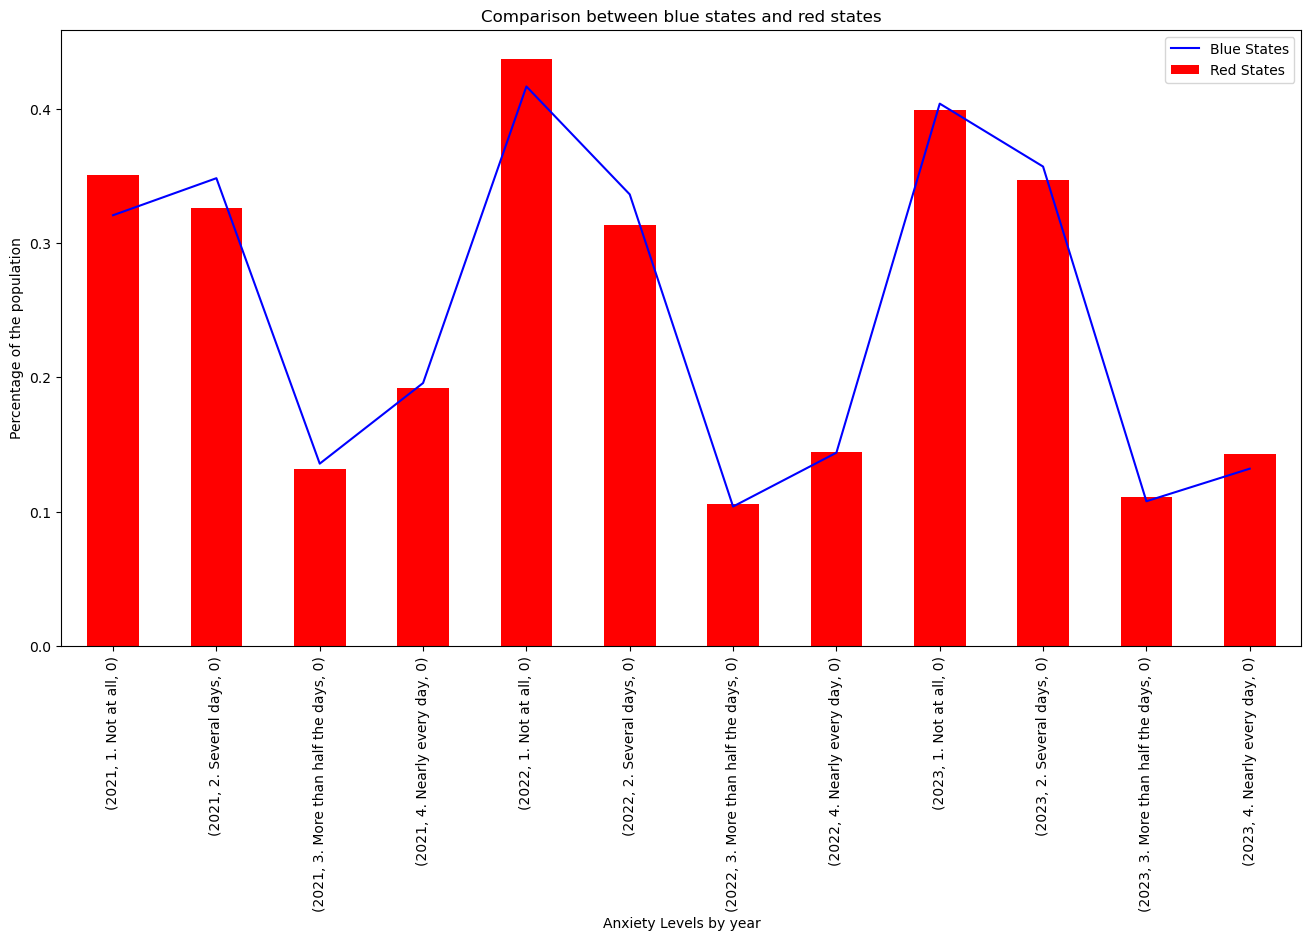

In [666]:
ax = Xst.plot(kind = 'bar', figsize=(16, 8), color='red')
Yst.plot(kind = 'line', ax=ax, color='blue')

ax.set_xlabel('Anxiety Levels by year')

ax.set_ylabel('Percentage of the population')

ax.set_title('Comparison between blue states and red states')

ax.legend(['Blue States', 'Red States'])


plt.xticks(rotation=90)
plt.show()

## Marital Status and Anxiety Levels

In [667]:
df_combined_subset4 = df_combined_subset.copy()

In [668]:
df_combined_subset4['MS'] = df_combined_subset4['MS'].map({1: '1. Now Married', 2: '2. Widowed', 3: '3. Divorced', 4: '4. Separated', 5:'5. Never Married'})

In [669]:
df_combined_subset4.head()

,SCRAM,PWEIGHT,YEAR,EST_ST,REGION,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMADLT,THHLD_NUMKID,MS,INCOME,EEDUC,AEDUC,ANXIOUS,DOWN,WORRY,INTEREST,ANYWORK,FREEFOOD,CURFOODSUF,TENURE,EXPNS_DIF,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,PRIVHLTH,PUBHLTH,RECVDVACC,red_states,blue_states
3,V230000001S51010926100111,43885.043866,2021,12,2,1978,2,1,2,2,2,1,6,2,4,1. Now Married,3.0,3,2,3.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1,1,2.0,1,0
4,V230000001S52011256710121,1487.656806,2021,32,4,1973,2,1,2,1,2,2,4,2,2,1. Now Married,8.0,7,2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,1.0,0,1
6,V230000001S79010004210121,4422.277690,2021,1,2,1994,2,1,2,2,2,2,2,2,0,1. Now Married,1.0,4,2,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,2.0,1,0
7,V230000001S79010802310121,1107.529513,2021,37,2,1956,2,1,2,1,2,1,2,2,0,1. Now Married,4.0,7,2,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2,1,2.0,1,0
8,V230000001S96010764500111,1401.694909,2021,1,2,1979,2,1,2,1,2,2,5,2,3,1. Now Married,8.0,7,2,4.0,4.0,4.0,4.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,2.0,1,0


In [670]:
df_combined_subset4['MS'].value_counts().sort_index()

1. Now Married      89487
2. Widowed           7932
3. Divorced         24207
4. Separated         2721
5. Never Married    32083
Name: MS, dtype: int64

In [671]:
counts_by_MS = df_combined_subset4.groupby('YEAR')['MS'].value_counts().unstack()

In [672]:
counts_by_MS

MS,1. Now Married,2. Widowed,3. Divorced,4. Separated,5. Never Married
YEAR,,,,,
2021,29959,2573,7521,904,9861
2022,30207,2773,8666,995,11429
2023,29321,2586,8020,822,10793


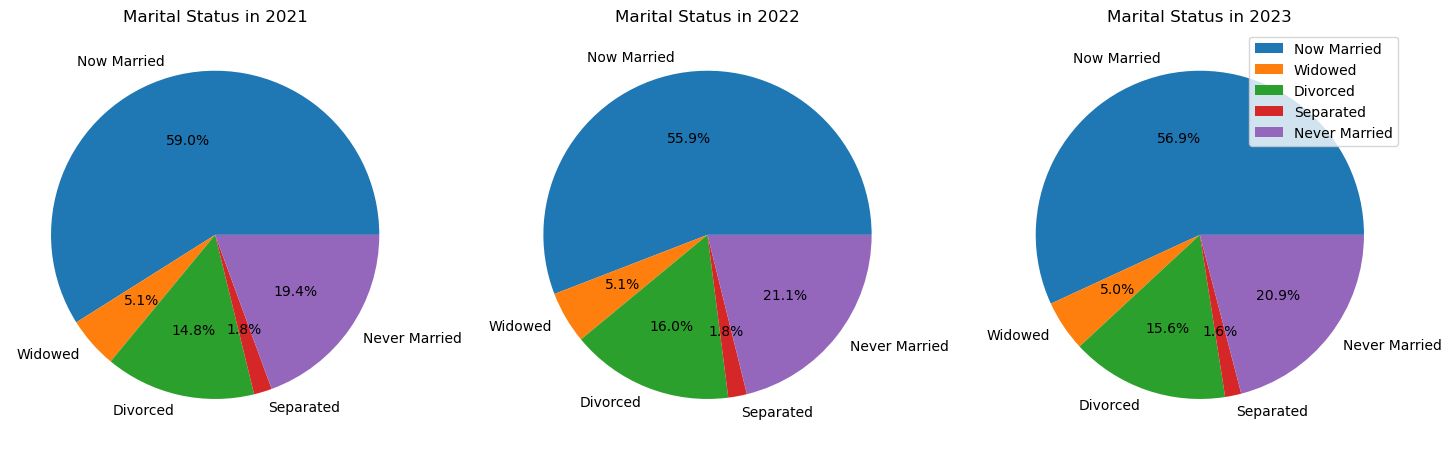

In [673]:
fig, axs = plt.subplots(1, 3, figsize=(18, 9))

Years = ['2021', '2022', '2023']
status = ['Now Married', 'Widowed', 'Divorced', 'Separated', 'Never Married']
for i, Year in enumerate(Years):
    axs[i].pie(counts_by_MS.loc[Year], labels=status, autopct = '%1.1f%%')
    axs[i].set_title('Marital Status in {}'.format(Year))

plt.legend(['Now Married', 'Widowed', 'Divorced', 'Separated', 'Never Married'])
plt.show()

In [674]:
MS_1 = df_combined_subset4[df_combined_subset4['MS'] == '1. Now Married']

M1st = MS_1[['YEAR', 'ANXIOUS', 'MS']]
M1st = M1st.groupby(['YEAR', 'ANXIOUS', 'MS']).agg({'ANXIOUS': 'count'}) / M1st.groupby(['YEAR']).agg({'ANXIOUS': 'count'})
M1st

ANXIOUS
YEAR ANXIOUS MS                      
2021 1.0     1. Now Married  0.363263
     2.0     1. Now Married  0.346474
     3.0     1. Now Married  0.125104
     4.0     1. Now Married  0.165159
2022 1.0     1. Now Married  0.469593
     2.0     1. Now Married  0.323766
     3.0     1. Now Married  0.090807
     4.0     1. Now Married  0.115834
2023 1.0     1. Now Married  0.449916
     2.0     1. Now Married  0.351045
     3.0     1. Now Married  0.094778
     4.0     1. Now Married  0.104260

In [675]:
MS_2 = df_combined_subset4[df_combined_subset4['MS'] == '2. Widowed']

M2nd = MS_2[['YEAR', 'ANXIOUS', 'MS']]
M2nd = M2nd.groupby(['YEAR', 'ANXIOUS', 'MS']).agg({'ANXIOUS': 'count'}) / M2nd.groupby(['YEAR']).agg({'ANXIOUS': 'count'})

In [676]:
MS_3 = df_combined_subset4[df_combined_subset4['MS'] == '3. Divorced']

M3rd = MS_3[['YEAR', 'ANXIOUS', 'MS']]
M3rd = M3rd.groupby(['YEAR', 'ANXIOUS', 'MS']).agg({'ANXIOUS': 'count'}) / M3rd.groupby(['YEAR']).agg({'ANXIOUS': 'count'})

In [677]:
MS_4 = df_combined_subset4[df_combined_subset4['MS'] == '4. Separated']

M4th = MS_4[['YEAR', 'ANXIOUS', 'MS']]
M4th = M4th.groupby(['YEAR', 'ANXIOUS', 'MS']).agg({'ANXIOUS': 'count'}) / M4th.groupby(['YEAR']).agg({'ANXIOUS': 'count'})

In [678]:
MS_5 = df_combined_subset4[df_combined_subset4['MS'] == '5. Never Married']

M5th = MS_5[['YEAR', 'ANXIOUS', 'MS']]
M5th = M5th.groupby(['YEAR', 'ANXIOUS', 'MS']).agg({'ANXIOUS': 'count'}) / M5th.groupby(['YEAR']).agg({'ANXIOUS': 'count'})

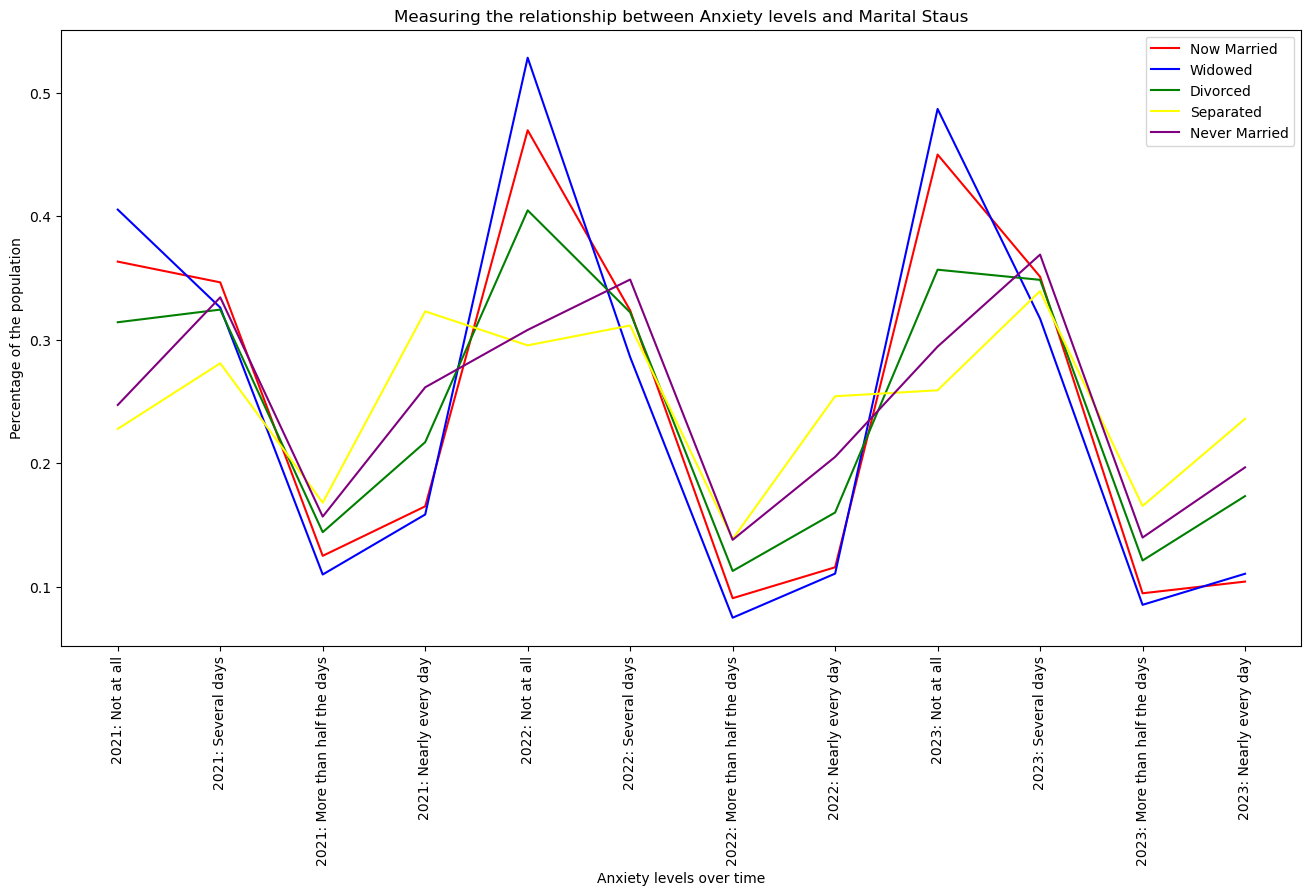

In [679]:
ax = M1st.plot(kind = 'line', figsize=(16, 8), color='red')
M2nd.plot(kind = 'line', ax=ax, color='blue')
M3rd.plot(kind = 'line', ax=ax, color='green')
M4th.plot(kind = 'line', ax=ax, color='yellow')
M5th.plot(kind = 'line', ax=ax, color='purple')

ax.set_xlabel('Anxiety levels over time')

ax.set_ylabel('Percentage of the population')

ax.set_title('Measuring the relationship between Anxiety levels and Marital Staus')

plt.xticks(rotation=90)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(['2021: Not at all', '2021: Several days', '2021: More than half the days', '2021: Nearly every day', '2022: Not at all', '2022: Several days', '2022: More than half the days', '2022: Nearly every day', '2023: Not at all', '2023: Several days', '2023: More than half the days', '2023: Nearly every day'])


plt.legend(['Now Married', 'Widowed', 'Divorced', 'Separated', 'Never Married'])
plt.show()

## LOGIT

In [680]:
df_combined_subset1 = df_combined_subset.copy()

In [681]:
df_combined_subset1.corr()

,PWEIGHT,EST_ST,REGION,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMADLT,THHLD_NUMKID,MS,INCOME,EEDUC,AEDUC,ANXIOUS,DOWN,WORRY,INTEREST,ANYWORK,FREEFOOD,CURFOODSUF,TENURE,EXPNS_DIF,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,PRIVHLTH,PUBHLTH,RECVDVACC,red_states,blue_states
PWEIGHT,1.000000,-0.016205,-0.093936,0.137132,-0.007496,0.135981,-0.016489,0.051488,-0.077643,-0.084481,0.212157,0.287518,0.043444,0.050836,-0.107052,-0.321156,0.000944,0.027930,0.048851,0.046034,0.051489,0.017519,-0.049988,0.109728,0.059815,0.121443,0.041510,0.002022,0.055023,-0.071716,0.002808,-0.000072,0.011270,0.064005,0.010047,0.035444,0.003223,-0.003223
EST_ST,-0.016205,1.000000,-0.163876,0.020292,-0.002305,-0.056286,0.000464,-0.060339,0.031080,-0.003366,0.000747,-0.017009,0.016265,-0.019037,-0.012297,-0.011477,0.003674,0.003633,0.001644,-0.000943,0.000320,-0.020673,0.006273,-0.011257,-0.017376,-0.012235,-0.001883,0.005296,0.011167,0.020397,-0.004111,-0.002640,0.011607,-0.007573,0.019977,-0.000859,0.129603,-0.129603
REGION,-0.093936,-0.163876,1.000000,0.011544,-0.002468,0.055450,0.001115,0.042921,-0.038700,-0.008882,0.030258,0.018724,0.026118,-0.008135,-0.013078,-0.030678,-0.004507,0.008522,0.012130,0.002239,0.007380,0.016009,-0.010726,-0.004263,0.025114,-0.015307,0.024609,0.004049,-0.001155,-0.012919,-0.007466,-0.008491,-0.045402,0.022899,-0.013327,0.010374,-0.017505,0.017505
TBIRTH_YEAR,0.137132,0.020292,0.011544,1.000000,0.002468,0.102433,0.059025,0.099500,-0.050497,0.064553,0.279385,0.083026,0.321496,0.283854,0.027189,-0.002892,0.022275,0.237763,0.188953,0.201821,0.168015,-0.437641,-0.024833,0.113994,0.361734,0.150597,-0.241140,0.175947,0.672823,-0.071765,0.069504,0.098969,-0.008295,-0.114499,0.510340,0.025269,0.009595,-0.009595
ABIRTH_YEAR,-0.007496,-0.002305,-0.002468,0.002468,1.000000,-0.008047,0.030303,-0.009902,0.017785,0.002259,0.004638,0.002914,0.003965,0.003600,0.013327,0.014665,0.004927,0.005867,0.006454,0.003560,0.003672,-0.014025,0.004288,-0.008031,0.008172,-0.006084,-0.007437,0.006872,0.015532,0.003087,0.001435,0.004908,0.005143,-0.005339,0.012887,-0.000005,0.001536,-0.001536
RHISPANIC,0.135981,-0.056286,0.055450,0.102433,-0.008047,1.000000,0.006107,0.059421,-0.308601,0.011224,0.107717,0.088158,0.073754,0.049180,-0.091421,-0.109372,-0.008161,0.039665,0.041500,0.051845,0.043655,-0.008506,-0.068580,0.097752,0.089247,0.105520,0.020437,0.008680,0.075731,-0.064729,0.007758,0.010752,-0.001590,0.053754,0.029852,0.017134,-0.047129,0.047129
AHISPANIC,-0.016489,0.000464,0.001115,0.059025,0.030303,0.006107,1.000000,-0.031288,0.032964,0.021162,0.018944,0.006362,0.021145,0.003438,0.049068,0.062027,0.042629,0.010308,-0.000434,-0.002130,-0.005633,-0.048909,0.016126,-0.035107,0.003861,-0.030079,-0.025794,0.032219,0.046736,0.025611,0.010762,0.015946,0.011919,-0.023486,0.043649,-0.007235,-0.010019,0.010019
RRACE,0.051488,-0.060339,0.042921,0.099500,-0.009902,0.059421,-0.031288,1.000000,0.016990,0.002858,0.076075,0.059874,0.054223,0.076388,-0.052171,-0.017395,0.001113,0.017375,0.031555,0.041634,0.035786,-0.019034,-0.056361,0.096006,0.096621,0.098519,-0.014976,0.003950,0.073278,-0.069305,-0.011009,-0.013572,-0.248878,0.021878,0.026336,-0.004871,-0.062051,0.062051
ARACE,-0.077643,0.031080,-0.038700,-0.050497,0.017785,-0.308601,0.032964,0.016990,1.000000,0.007804,-0.047347,-0.039076,-0.032127,-0.027353,0.048577,0.066922,0.025191,-0.018377,-0.022776,-0.022793,-0.021224,-0.003015,0.032945,-0.048059,-0.042891,-0.054602,-0.011805,-0.006623,-0.033907,0.032285,-0.007336,-0.007633,-0.008096,-0.029776,-0.010763,-0.006135,0.035022,-0.035022
EGENID_BIRTH,-0.084481,-0.003366,-0.008882,0.064553,0.002259,0.011224,0.021162,0.002858,0.007804,1.000000,0.032332,-0.018566,0.062395,0.056131,-0.133081,-0.035030,0.003442,0.133558,0.079766,0.137079,0.068341,0.033800,-0.045949,0.063294,0.050498,0.085449,0.012291,0.017676,0.040465,-0.092707,0.051987,0.106015,-0.013881,0.033509,0.001907,0.002853,0.012261,-0.012261


In [682]:
df_combined_subset1['NOT_ANXIOUS'] = df_combined_subset1['ANXIOUS'].map({1:1, 2: 0, 3:0, 4:0})
df_combined_subset1['SEVERAL_DAYS'] = df_combined_subset1['ANXIOUS'].map({1:0, 2: 1, 3:0, 4:0})
df_combined_subset1['HALF_THE_DAYS'] = df_combined_subset1['ANXIOUS'].map({1:0, 2: 0, 3:1, 4:0})
df_combined_subset1['ANXIOUS_EVERY_DAY'] = df_combined_subset1['ANXIOUS'].map({1:0, 2: 0, 3:0, 4:1})

In [683]:
df_combined_subset1['ANXIOUS'].value_counts()

1.0    60608
2.0    53040
4.0    24703
3.0    18079
Name: ANXIOUS, dtype: int64

In [684]:
pd.crosstab(df_combined_subset1['ANXIOUS'], df_combined_subset1['NOT_ANXIOUS'], margins=True)

NOT_ANXIOUS,0,1,All
ANXIOUS,,,
1.0,0,60608,60608
2.0,53040,0,53040
3.0,18079,0,18079
4.0,24703,0,24703
All,95822,60608,156430


In [685]:
logit = smf.logit('NOT_ANXIOUS ~ TBIRTH_YEAR + RHISPANIC + RRACE + EGENID_BIRTH + THHLD_NUMPER + THHLD_NUMADLT + MS + INCOME + EEDUC + ANYWORK + FREEFOOD + CURFOODSUF + TENURE + EXPNS_DIF + HLTHINS1 + HLTHINS2 + HLTHINS3 + HLTHINS4 + HLTHINS5 + HLTHINS6 + HLTHINS7 + PRIVHLTH + PUBHLTH + RECVDVACC + EST_ST + INTEREST + DOWN + WORRY', data = df_combined_subset1).fit()


Optimization terminated successfully.
         Current function value: 0.328937
         Iterations 8


In [686]:
print(logit.summary().tables[0])

                           Logit Regression Results                           
Dep. Variable:            NOT_ANXIOUS   No. Observations:               156430
Model:                          Logit   Df Residuals:                   156401
Method:                           MLE   Df Model:                           28
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                  0.5073
Time:                        17:42:40   Log-Likelihood:                -51456.
converged:                       True   LL-Null:                   -1.0443e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000


In [687]:
print(logit.summary().tables[1])

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.6576      1.560     32.480      0.000      47.601      53.714
TBIRTH_YEAR      -0.0218      0.001    -27.425      0.000      -0.023      -0.020
RHISPANIC         0.1120      0.030      3.683      0.000       0.052       0.172
RRACE             0.1787      0.011     15.976      0.000       0.157       0.201
EGENID_BIRTH     -0.3736      0.016    -23.052      0.000      -0.405      -0.342
THHLD_NUMPER      0.0079      0.009      0.903      0.366      -0.009       0.025
THHLD_NUMADLT     0.0073      0.013      0.569      0.569      -0.018       0.033
MS                0.0158      0.006      2.598      0.009       0.004       0.028
INCOME           -0.0436      0.005     -8.256      0.000      -0.054      -0.033
EEDUC            -0.1826      0.006    -28.151      0.000      -0.195      -0.170
ANYWORK         

In [688]:
df_combined_subset1['probabilities'] = logit.predict()

In [690]:
df_combined_subset1[['TBIRTH_YEAR', 'EGENID_BIRTH', 'MS', 'INCOME', 'CURFOODSUF', 'TENURE', 'EXPNS_DIF', 'THHLD_NUMPER', 'ANYWORK', 'FREEFOOD', 'INTEREST', 'DOWN', 'WORRY', 'NOT_ANXIOUS', 'probabilities']].sample(10, random_state=101)

,TBIRTH_YEAR,EGENID_BIRTH,MS,INCOME,CURFOODSUF,TENURE,EXPNS_DIF,THHLD_NUMPER,ANYWORK,FREEFOOD,INTEREST,DOWN,WORRY,NOT_ANXIOUS,probabilities
82802,1999,1,5.0,3.0,1.0,1.0,2.0,4,1.0,2.0,3.0,3.0,2.0,0,0.006085
37398,1958,2,1.0,3.0,2.0,3.0,3.0,2,2.0,1.0,1.0,1.0,4.0,0,0.001645
90470,1982,1,1.0,4.0,3.0,2.0,4.0,3,1.0,2.0,4.0,4.0,3.0,0,0.000059
110502,1995,2,5.0,5.0,1.0,3.0,1.0,1,1.0,2.0,1.0,1.0,1.0,0,0.647838
88182,1982,2,3.0,4.0,2.0,2.0,4.0,3,1.0,2.0,2.0,2.0,2.0,0,0.017690
105553,1973,2,5.0,5.0,1.0,1.0,1.0,1,1.0,2.0,1.0,2.0,3.0,0,0.004546
47738,1960,2,1.0,4.0,1.0,1.0,1.0,2,1.0,2.0,1.0,1.0,1.0,1,0.795908
225534,1945,2,1.0,4.0,2.0,1.0,1.0,2,2.0,2.0,1.0,1.0,1.0,1,0.909946
161923,1994,2,5.0,1.0,2.0,3.0,3.0,3,2.0,2.0,2.0,2.0,2.0,0,0.047737
96656,1939,2,1.0,5.0,1.0,1.0,1.0,2,2.0,2.0,1.0,1.0,1.0,1,0.918526


In [691]:
df_combined_subset1['predictions']=[1 if i >= 0.5 else 0 for i in df_combined_subset1['probabilities']] 

In [692]:
mse = np.mean((df_combined_subset1['NOT_ANXIOUS'] - df_combined_subset1['predictions']) ** 2)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.1308125039953973


In [693]:
df_combined_subset1[['TBIRTH_YEAR', 'EGENID_BIRTH', 'MS', 'INCOME', 'CURFOODSUF', 'TENURE', 'EXPNS_DIF', 'THHLD_NUMPER', 'ANYWORK', 'FREEFOOD', 'INTEREST', 'DOWN', 'WORRY', 'NOT_ANXIOUS', 'probabilities', 'predictions']].sample(10, random_state=101)


,TBIRTH_YEAR,EGENID_BIRTH,MS,INCOME,CURFOODSUF,TENURE,EXPNS_DIF,THHLD_NUMPER,ANYWORK,FREEFOOD,INTEREST,DOWN,WORRY,NOT_ANXIOUS,probabilities,predictions
82802,1999,1,5.0,3.0,1.0,1.0,2.0,4,1.0,2.0,3.0,3.0,2.0,0,0.006085,0
37398,1958,2,1.0,3.0,2.0,3.0,3.0,2,2.0,1.0,1.0,1.0,4.0,0,0.001645,0
90470,1982,1,1.0,4.0,3.0,2.0,4.0,3,1.0,2.0,4.0,4.0,3.0,0,0.000059,0
110502,1995,2,5.0,5.0,1.0,3.0,1.0,1,1.0,2.0,1.0,1.0,1.0,0,0.647838,1
88182,1982,2,3.0,4.0,2.0,2.0,4.0,3,1.0,2.0,2.0,2.0,2.0,0,0.017690,0
105553,1973,2,5.0,5.0,1.0,1.0,1.0,1,1.0,2.0,1.0,2.0,3.0,0,0.004546,0
47738,1960,2,1.0,4.0,1.0,1.0,1.0,2,1.0,2.0,1.0,1.0,1.0,1,0.795908,1
225534,1945,2,1.0,4.0,2.0,1.0,1.0,2,2.0,2.0,1.0,1.0,1.0,1,0.909946,1
161923,1994,2,5.0,1.0,2.0,3.0,3.0,3,2.0,2.0,2.0,2.0,2.0,0,0.047737,0
96656,1939,2,1.0,5.0,1.0,1.0,1.0,2,2.0,2.0,1.0,1.0,1.0,1,0.918526,1


In [694]:
pd.crosstab(df_combined_subset1['NOT_ANXIOUS'], df_combined_subset1['predictions'], margins=True) #confusion matrix

predictions,0,1,All
NOT_ANXIOUS,,,
0,81944,13878,95822
1,6585,54023,60608
All,88529,67901,156430


In [695]:
accuracy = (((81944 + 54023) / (81944 + 54023 + 6585 + 13878)) * 100)
print('Accuracy of the model:', accuracy, '%')

specificity = (((81944) / (81944 + 13878)) * 100)
print('Specificity of the model:', specificity, '%')

sensitivity = ((54023) / (54023 + 6585) * 100)
print('Sensitivity of the model:', sensitivity, '%')

Accuracy of the model: 86.91874960046026 %
Specificity of the model: 85.51689591116862 %
Sensitivity of the model: 89.13509767687434 %


## Decision Tree Classifier

In [696]:
df_combined_subset2 = df_combined_subset.copy()

In [697]:
df_combined_subset2.head()

,SCRAM,PWEIGHT,YEAR,EST_ST,REGION,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMADLT,THHLD_NUMKID,MS,INCOME,EEDUC,AEDUC,ANXIOUS,DOWN,WORRY,INTEREST,ANYWORK,FREEFOOD,CURFOODSUF,TENURE,EXPNS_DIF,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,PRIVHLTH,PUBHLTH,RECVDVACC,red_states,blue_states
3,V230000001S51010926100111,43885.043866,2021,12,2,1978,2,1,2,2,2,1,6,2,4,1.0,3.0,3,2,3.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1,1,2.0,1,0
4,V230000001S52011256710121,1487.656806,2021,32,4,1973,2,1,2,1,2,2,4,2,2,1.0,8.0,7,2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,1.0,0,1
6,V230000001S79010004210121,4422.277690,2021,1,2,1994,2,1,2,2,2,2,2,2,0,1.0,1.0,4,2,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,2.0,1,0
7,V230000001S79010802310121,1107.529513,2021,37,2,1956,2,1,2,1,2,1,2,2,0,1.0,4.0,7,2,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2,1,2.0,1,0
8,V230000001S96010764500111,1401.694909,2021,1,2,1979,2,1,2,1,2,2,5,2,3,1.0,8.0,7,2,4.0,4.0,4.0,4.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,2.0,1,0


In [698]:
y = df_combined_subset2['ANXIOUS'].to_numpy()
X = df_combined_subset2[['TBIRTH_YEAR', 'RHISPANIC', 'RRACE', 'EGENID_BIRTH', 'THHLD_NUMPER', 'THHLD_NUMADLT', 'MS', 'INCOME', 'EEDUC', 'ANYWORK', 'FREEFOOD', 'CURFOODSUF', 'TENURE', 'EXPNS_DIF', 'HLTHINS1', 'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7', 'PRIVHLTH', 'PUBHLTH', 'RECVDVACC', 'red_states', 'blue_states']].to_numpy()
                         

In [699]:
ynames = ['Not Anxious', 'Several Days', 'More than half the days', 'Almost Everyday']
Xnames = ['TBIRTH_YEAR', 'RHISPANIC', 'RRACE', 'EGENID_BIRTH', 'THHLD_NUMPER', 'THHLD_NUMADLT', 'MS', 'INCOME', 'EEDUC', 'ANYWORK', 'FREEFOOD', 'CURFOODSUF', 'TENURE', 'EXPNS_DIF', 'HLTHINS1', 'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7', 'PRIVHLTH', 'PUBHLTH', 'RECVDVACC', 'red_states', 'blue_states']


In [700]:
dtc = tree.DecisionTreeClassifier().fit(X, y)

In [701]:
df_combined_subset2['predictions'] = dtc.predict(X)
df_combined_subset2[['ANXIOUS', 'predictions']]

,ANXIOUS,predictions
3,3.0,3.0
4,1.0,1.0
6,2.0,2.0
7,1.0,1.0
8,4.0,4.0
...,...,...
231751,1.0,1.0
231752,2.0,2.0
231754,4.0,4.0
231755,1.0,1.0


In [702]:
pd.crosstab(df_combined_subset2['ANXIOUS'], df_combined_subset2['predictions'], margins=True)

predictions,1.0,2.0,3.0,4.0,All
ANXIOUS,,,,,
1.0,60126,443,24,15,60608
2.0,2325,50657,29,29,53040
3.0,590,457,17028,4,18079
4.0,525,453,105,23620,24703
All,63566,52010,17186,23668,156430


In [703]:
R2 = (df_combined_subset2['ANXIOUS'].corr(df_combined_subset2['predictions']))**2
R2

0.9310222841987477

In [704]:
X2 = df_combined_subset2[Xnames]

importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]

for i in range(X.shape[1]):
    print(f'{i+1}. {X2.columns[indices[i]]} {importances[indices[i]].round(4)}')

1. TBIRTH_YEAR 0.216
2. INCOME 0.124
3. EEDUC 0.0704
4. THHLD_NUMPER 0.0689
5. EXPNS_DIF 0.0648
6. TENURE 0.0555
7. THHLD_NUMADLT 0.0512
8. MS 0.05
9. HLTHINS2 0.0293
10. ANYWORK 0.0278
11. RRACE 0.0226
12. red_states 0.0223
13. HLTHINS1 0.0221
14. blue_states 0.0212
15. RECVDVACC 0.0211
16. RHISPANIC 0.0195
17. CURFOODSUF 0.0193
18. PRIVHLTH 0.015
19. PUBHLTH 0.0131
20. EGENID_BIRTH 0.0123
21. HLTHINS4 0.0116
22. FREEFOOD 0.0108
23. HLTHINS5 0.0099
24. HLTHINS3 0.0097
25. HLTHINS6 0.0091
26. HLTHINS7 0.0024


In [705]:
df_combined_subset2.head()

,SCRAM,PWEIGHT,YEAR,EST_ST,REGION,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMADLT,THHLD_NUMKID,MS,INCOME,EEDUC,AEDUC,ANXIOUS,DOWN,WORRY,INTEREST,ANYWORK,FREEFOOD,CURFOODSUF,TENURE,EXPNS_DIF,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,PRIVHLTH,PUBHLTH,RECVDVACC,red_states,blue_states,predictions
3,V230000001S51010926100111,43885.043866,2021,12,2,1978,2,1,2,2,2,1,6,2,4,1.0,3.0,3,2,3.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1,1,2.0,1,0,3.0
4,V230000001S52011256710121,1487.656806,2021,32,4,1973,2,1,2,1,2,2,4,2,2,1.0,8.0,7,2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,1.0,0,1,1.0
6,V230000001S79010004210121,4422.277690,2021,1,2,1994,2,1,2,2,2,2,2,2,0,1.0,1.0,4,2,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,2.0,1,0,2.0
7,V230000001S79010802310121,1107.529513,2021,37,2,1956,2,1,2,1,2,1,2,2,0,1.0,4.0,7,2,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2,1,2.0,1,0,1.0
8,V230000001S96010764500111,1401.694909,2021,1,2,1979,2,1,2,1,2,2,5,2,3,1.0,8.0,7,2,4.0,4.0,4.0,4.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2,2.0,1,0,4.0


In [706]:
Xout = pd.DataFrame({
    'TBIRTH_YEAR': [1965, 1995, 1999],
    'RHISPANIC': [1, 0, 0],
    'RRACE': [2, 1, 2],
    'EGENID_BIRTH': [1, 2, 1],
    'THHLD_NUMPER': [4, 6, 3],
    'THHLD_NUMADLT': [1, 2, 2],
    'MS': [4, 2, 3],
    'INCOME': [4, 3, 7],
    'EEDUC': [2, 3, 5],
    'ANYWORK': [1, 2, 1],
    'FREEFOOD': [1, 1, 2],
    'CURFOODSUF': [3, 1, 1],
    'TENURE': [3, 1, 2],
    'EXPNS_DIF': [4, 1, 3],
    'HLTHINS1': [1, 2, 1],
    'HLTHINS2': [2, 2, 1],
    'HLTHINS3': [1, 1, 2],
    'HLTHINS4': [1, 0, 0],
    'HLTHINS5': [2, 1, 1],
    'HLTHINS6': [2, 2, 2],
    'HLTHINS7': [2, 1, 2],
    'PRIVHLTH': [1, 1, 1],
    'PUBHLTH': [1, 2, 1],
    'RECVDVACC': [1, 2, 2],
    'red_states': [0, 1, 1],
    'blue_states': [1, 0, 0]
})

In [707]:
Xout
p = dtc.predict(Xout)
Xout['predictions'] = p
Xout

/Users/jayeshlasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,TBIRTH_YEAR,RHISPANIC,RRACE,EGENID_BIRTH,THHLD_NUMPER,THHLD_NUMADLT,MS,INCOME,EEDUC,ANYWORK,FREEFOOD,CURFOODSUF,TENURE,EXPNS_DIF,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,PRIVHLTH,PUBHLTH,RECVDVACC,red_states,blue_states,predictions
0,1965,1,2,1,4,1,4,4,2,1,1,3,3,4,1,2,1,1,2,2,2,1,1,1,0,1,2.0
1,1995,0,1,2,6,2,2,3,3,2,1,1,1,1,2,2,1,0,1,2,1,1,2,2,1,0,3.0
2,1999,0,2,1,3,2,3,7,5,1,2,1,2,3,1,1,2,0,1,2,2,1,1,2,1,0,2.0


## THE END